In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;
sns.set()
from sklearn.cluster import KMeans

# Read the data

In [4]:
data = pd.read_csv("datasets/satisfactionloyalty.csv");
data.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


# Plot data

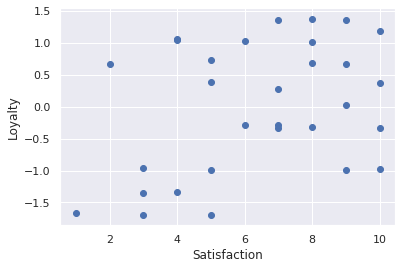

In [5]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

# Clustering

In [6]:
x=data.copy()
x

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


# Clustering

In [7]:
kmeans=KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# Clustering Results

In [8]:
clusters=x.copy()
clusters['cluster_pred']=kmeans.fit_predict(x)

# Plot

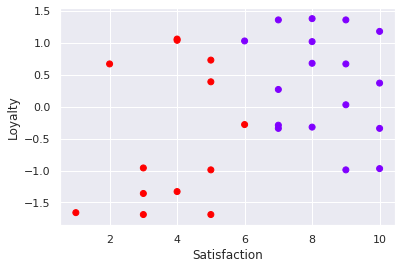

In [9]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

# Standardizing the variables

In [10]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

# Elbow Method

inertia_: Sum of squared distances of samples to their closest cluster center.

In [11]:
wcss = []
for i in range(1,30):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.4602053116458205,
 4.352037765292862,
 3.816324896488448,
 3.3881513928614355,
 2.711433831430747,
 2.3181875479438374,
 2.0355316571134074,
 1.8395507829632274,
 1.5724205073309323,
 1.3602105207952933,
 1.2302940301324312,
 0.9062963379251507,
 0.7706518173776857,
 0.6366791702988839,
 0.549713762368285,
 0.4239312504600061,
 0.3227119817275011,
 0.24721053307798668,
 0.17170908442847233,
 0.11383861748989679,
 0.0559681505513213,
 0.0014517677692203244,
 0.00020024383023728806]

# Visualize elbow

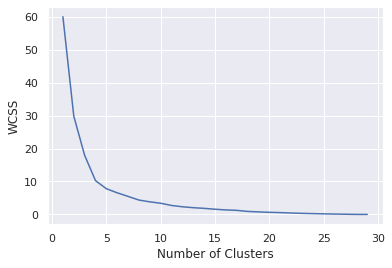

In [12]:
plt.plot(range(1,30),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
kmeans_new=KMeans(4)
kmeans.fit(x)
cluster_new=x.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(x_scaled)
cluster_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,0
1,6,-0.28,3
2,5,-0.99,0
3,7,-0.29,3
4,4,1.06,2
5,1,-1.66,0
6,10,-0.97,3
7,8,-0.32,3
8,8,1.02,1
9,8,0.68,1


# Plot the new clusters

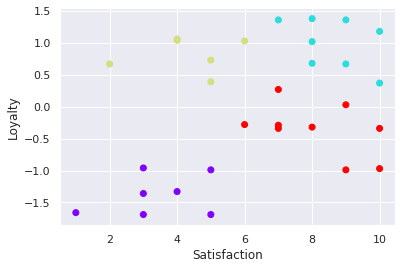

In [14]:
plt.scatter(cluster_new['Satisfaction'], cluster_new['Loyalty'], c=cluster_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

# Results
1. The xxx dots are the people who are less satisfied and less loyal and therefore can be termed as alienated.
2. The yyy dots are people with high loyalty and less satisfaction.
3. The zzz dots are the people with high loyalty and high satisfaction and they are the fans.
4. The www blue dots are the people who are in the midst of things.